In [1]:
import pandas as pd
import numpy as np

from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

C:\Users\Eric\Anaconda3\envs\DataSC\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#read the data
dataset = pd.read_csv('train.csv')
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
''' 
1.Data describe:
    Titanic, the famous tragedy, sideswiped an iceberg during its maiden voyage.
    There are some information of passengers been record in this dataset.  
    In a competition, this dataset was used to predict the passengers survival probability.

2.Feature:
    Survived: 0 = No, 1 = Yes
    Pclass: Ticket class, 1 = 1st(Upper), 2 = 2nd, 3 = 3rd(Lower)
    SibSp: The number of siblings / spouses aboard the Titanic
    Parch: The number of parents / children aboard the Titanic
    Fare: Passenger fare
    Cabin: Cabin number
    Embarked: Port of Embarkation，C = Cherbourg, Q = Queenstown, S = Southampton
'''

' \n1.Data describe:\n    Titanic, the famous tragedy, sideswiped an iceberg during its maiden voyage.\n    There are some information of passengers been record in this dataset.  \n    In a competition, this dataset was used to predict the passengers survival probability.\n\n2.Feature:\n    Survived: 0 = No, 1 = Yes\n    Pclass: Ticket class, 1 = 1st(Upper), 2 = 2nd, 3 = 3rd(Lower)\n    SibSp: The number of siblings / spouses aboard the Titanic\n    Parch: The number of parents / children aboard the Titanic\n    Fare: Passenger fare\n    Cabin: Cabin number\n    Embarked: Port of Embarkation，C = Cherbourg, Q = Queenstown, S = Southampton\n'

# Data Preprocessing

In [4]:
# transform string the to binary value
dataset['Sex'] = dataset['Sex'].map({'male':1,'female':0}).astype(int)

# suing onehot encoding transform Embarked feature to dummy variable
dataset = pd.get_dummies(data=dataset, columns=['Embarked'])

# using average value to replace the Nan
age_mean = dataset['Age'].mean()
dataset['Age'] = dataset['Age'].fillna(age_mean)

fare_mean = dataset['Fare'].mean()
dataset['Fare'] = dataset['Fare'].fillna(fare_mean)
# df.fillna:  Fill NA/NaN values using the specified method


# delete some string feature that we want't to deal with
del dataset['PassengerId']
del dataset['Cabin']
del dataset['Ticket']
del dataset['Name']

In [5]:
# standardization
#mms = MinMaxScaler()
#dataset['Age'] = mms.fit_transform(dataset['Age'].reshape(-1,1))
#dataset['Fare'] = mms.fit_transform(dataset['Fare'].reshape(-1,1))

In [6]:
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


In [7]:
# X: input of model,  y: output of model 
X = dataset.iloc[:,[i for i in range(1,10)]].values
y = dataset.iloc[:,0].values

# Simple Decision Tree with two features

In [8]:
# basic sklearn syntax of decision tree:
'''
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=depth)
tree_clf.fit(X_train, y_train) 
y_pred = tree_clf.predict(X_test)
'''

"\nfrom sklearn.tree import DecisionTreeClassifier\ntree_clf = DecisionTreeClassifier(criterion='gini', max_depth=depth)\ntree_clf.fit(X_train, y_train) \ny_pred = tree_clf.predict(X_test)\n"

In [9]:
def plot_tree_dot(clf,X_train, y_train ):
    # generate the tree.dot file
    clf.fit(X_train, y_train)
    export_graphviz(tree_clf, out_file="tree.dot", feature_names=['Age', 'Fare'],
                    class_names=['Not Survived', 'Survived'])

    # transform .dot file to .png
    #please install the package 'Graphviz' to generate the tree fig.
    !dot -Tpng tree.dot -o tree.png


    import matplotlib.image as mpimg
    img = mpimg.imread('tree.png')
    fig = plt.figure(figsize=(20,30))
    plt.imshow(img)
    plt.show()

In [10]:
def Train_Decision(X, y, try_max_depth=20, max_notchange=10):
    # train model with different depth
    
    not_change_time = 0
    max_acc = 0
    best_depth = 0
    global tree_clf, train_dic
    global X_train_b, X_test_b, y_train_b, y_test_b

    for depth in range(2, try_max_depth):
        # spliting train data and test data randomly
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)

        # from sklearn.tree import DecisionTreeClassifier
        clf = DecisionTreeClassifier(criterion='gini', max_depth=depth)
        clf.fit(X_train, y_train) # Age / Fare


        y_pred = clf.predict(X_test) # Age / Fare
        cm = confusion_matrix(y_test, y_pred)
        accracy = np.sum(np.diag(cm)) / np.sum(cm)
        train_dic[depth] = [accracy, y_pred]

        if accracy > max_acc:
            max_acc = accracy
            best_ypred = y_pred
            best_depth = depth
            best_cm = cm
            X_train_b, X_test_b, y_train_b, y_test_b = X_train, X_test, y_train, y_test
            
        else:
            not_change_time += 1

        if not_change_time > max_notchange:
            tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=best_depth)
            plot_tree_dot(tree_clf,X_train_b, y_train_b) # plot_tree_dot: generate the tree.dot file
            break
            
    return max_acc, best_depth, best_ypred, best_cm

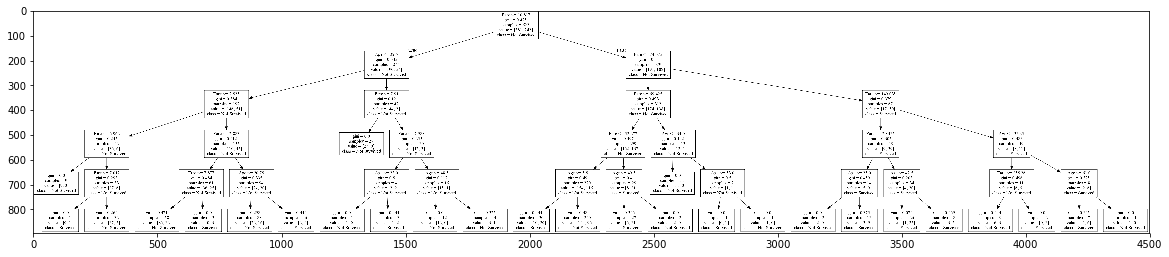

best accracy: 0.7201492537313433 in tree depth: 5


array([[157,  11],
       [ 64,  36]], dtype=int64)

In [11]:
# Executive function
train_dic = {}
accracy, depth, y_pred, cm = Train_Decision(X[:,[2,5]], y)
print('best accracy: {} in tree depth: {}'.format(accracy, depth))
cm

In [12]:
def plot_2D(tree_clf, X_train, X_test, y_train, y_test):
    
    tree_clf.fit(X_train, y_train) # Age / Fare
    
    # Visualising the Training set results in 2D-case   
    fig = plt.figure(figsize=(8,8))
    X_set, y_set = X_train, y_train
    X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min()-1, stop=X_set[:, 0].max()+1, step=1),
                         np.arange(start=X_set[:, 1].min()-1, stop=X_set[:, 1].max()+1, step=10))
    plt.contourf(X1, X2, tree_clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                                            alpha = 0.75, cmap = ListedColormap(('#DDDDDD', '#33FF33')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('k', 'g'))(i), label = j)
    plt.title('Decision Tree (Train set)')
    plt.xlabel('Age')
    plt.ylabel('Fare')
    plt.legend()
    plt.show()
    
       
    

    # Visualising the Test results in 2D-case
    fig = plt.figure(figsize=(8,8))
    X_set, y_set = X_test, y_test
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 1),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 10))
    plt.contourf(X1, X2, tree_clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('#DDDDDD', '#33FF33')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('k', 'g'))(i), label = j)
    plt.title('Decision Tree (Test set)')
    plt.xlabel('Age')
    plt.ylabel('Fare')
    plt.legend()
    plt.show()

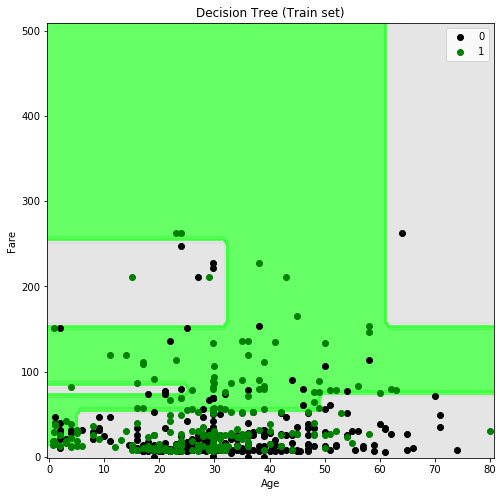

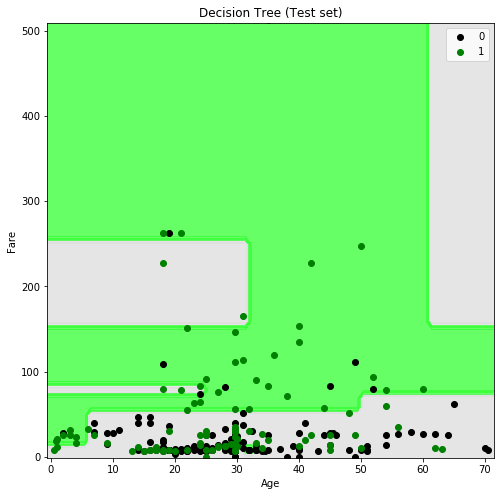

In [13]:
plot_2D(tree_clf, X_train_b, X_test_b, y_train_b, y_test_b)

# Random Forest with whole features

In [14]:
# basic sklearn syntax of RandomForest:
'''
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)


# n_estimators: the number of tree
'''

"\nfrom sklearn.ensemble import RandomForestClassifier\nclassifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)\nclassifier.fit(X_train, y_train)\ny_pred = classifier.predict(X_test)\n\n\n# n_estimators: the number of tree\n"

In [15]:
def Train_RandomForest(X, y, max_tree=100, max_notchange=20):  
    not_change_time = 0
    max_acc = 0
    best_number = 0
    global random_clf, train_random_dic


    for tree in range(10, max_tree):
        # spliting train data and test data randomly
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)

        # from sklearn.tree import DecisionTreeClassifier
        clf = RandomForestClassifier(n_estimators = tree, criterion = 'entropy', random_state = 0)
        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)
        accracy = np.sum(np.diag(cm)) / np.sum(cm)
        train_random_dic[tree] = [accracy, y_pred]

        if accracy > max_acc:
            max_acc = accracy
            best_ypred = y_pred
            best_number = tree
            best_cm = cm
            X_train_b, X_test_b, y_train_b, y_test_b = X_train, X_test, y_train, y_test
            
        else:
            not_change_time += 1

        if not_change_time > max_notchange:
            random_clf = RandomForestClassifier(n_estimators = best_number, criterion = 'entropy', random_state = 0)
            plot_tree_dot(random_clf, X_train_b, y_train_b)
            
            break
            
    return max_acc, best_number, best_ypred, best_cm

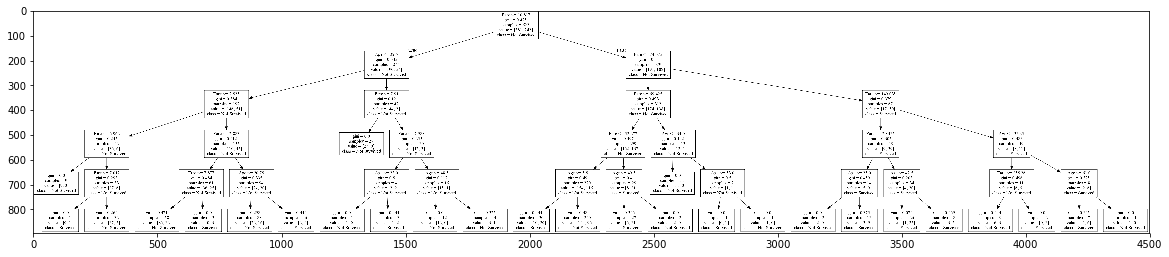

best accracy: 0.8283582089552238 in tree number: 25


array([[151,  17],
       [ 29,  71]], dtype=int64)

In [16]:
train_random_dic = {}
acc, No_tree, y_pred, cm = Train_RandomForest(X, y)
print('best accracy: {} in tree number: {}'.format(acc, No_tree))
cm